___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

In [1]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [18]:
# Checking the shape of one image
X_train[5].shape

# 28X28 사이즈의 작은 이미지임을 확인 할 수 있다.
# grayscale 이라서 마지막이 공백인가?

(28, 28)

In [9]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

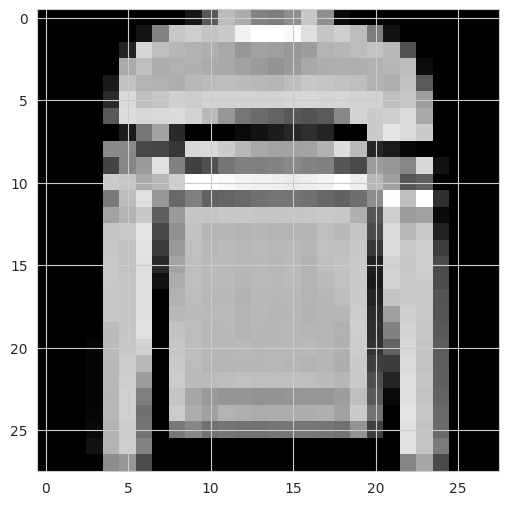

In [32]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

# 긴팔 티셔츠로 보인다.

In [11]:
y_train[5]

2

In [12]:
y_train.shape

(60000,)

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.unique(y_train, return_counts=True)

# 10 개의 유니크 벨류를 가지고있다.
# perfectly 발란스한 데이터를 가지고있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=[
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [16]:
y_train[0]

9

In [22]:
classes[y_train[0]]

'Ankle boot'

In [21]:
classes[int(y_train[0])]
# 이미지에 접근하기 위해 이 라인을 사용할것.

'Ankle boot'

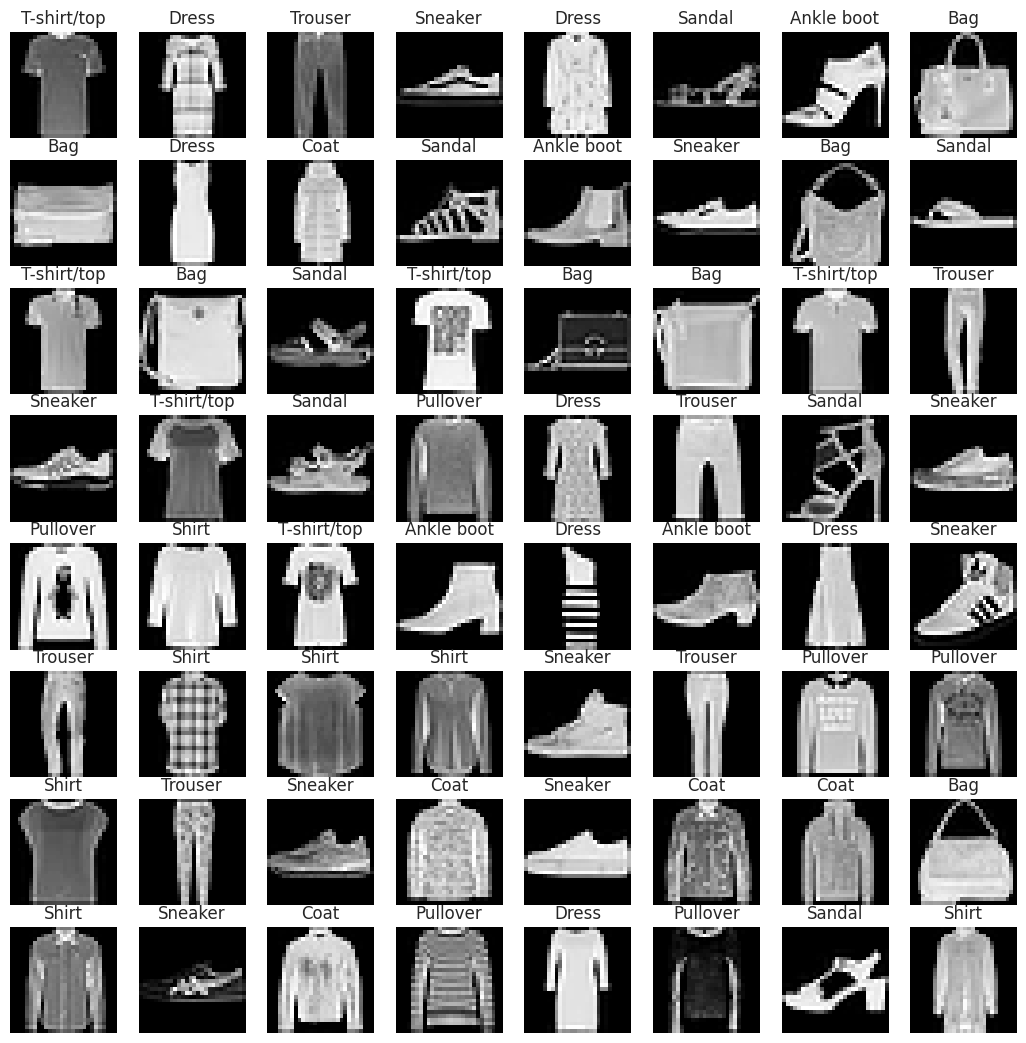

In [31]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)


for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [23]:
X_train[5].min()

0

In [24]:
X_train[5].max()

255

In [25]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [26]:
X_train[5].min()

0.0

In [27]:
X_train[5].max()

1.0

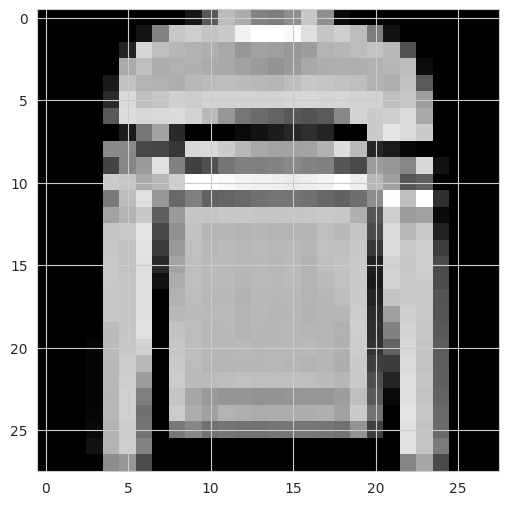

In [30]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [34]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [35]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [36]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
y_train.shape

(60000,)

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [43]:
y_train[5]

2

In [44]:
Y_train[5]


# 우리는 10개의 각기 다른 카테고리가 있으니 아웃풋 또한 10개여야 한다.
# 따라서 소프트맥스 활성화 함수를 사용할것.

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [53]:
model = Sequential()

model.add( Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector = filter = kernel
        input_shape=(28, 28, 1),
        activation="relu",
        padding="same", # output shape은 똑같을것임.
))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20412)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2612864   
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

# 만약 아무런 긍정적인 변화가 없으면, just wait for first 4 epoch.

In [57]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 19s 5ms/step - loss: 0.3878 - accuracy: 0.8619 - val_loss: 0.3121 - val_accuracy: 0.8874
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2576 - accuracy: 0.9055 - val_loss: 0.2805 - val_accuracy: 0.8945
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2138 - accuracy: 0.9195 - val_loss: 0.2526 - val_accuracy: 0.9095
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1826 - accuracy: 0.9323 - val_loss: 0.2763 - val_accuracy: 0.9036
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1519 - accuracy: 0.9438 - val_loss: 0.2458 - val_accuracy: 0.9144
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1277 - accuracy: 0.9533 - val_loss: 0.2778 - val_accuracy: 0.9119
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1085 - accuracy: 0.9605 - val_loss: 0.3121 - val_accurac

**TASK 7: Plot values of metrics you used in your model.**

In [58]:
X_train.shape

(60000, 28, 28, 1)

In [59]:
Y_train.shape

(60000, 10)

In [60]:
model.metrics_names

['loss', 'accuracy']

In [105]:
summary = pd.DataFrame(model.history.history)
summary

""


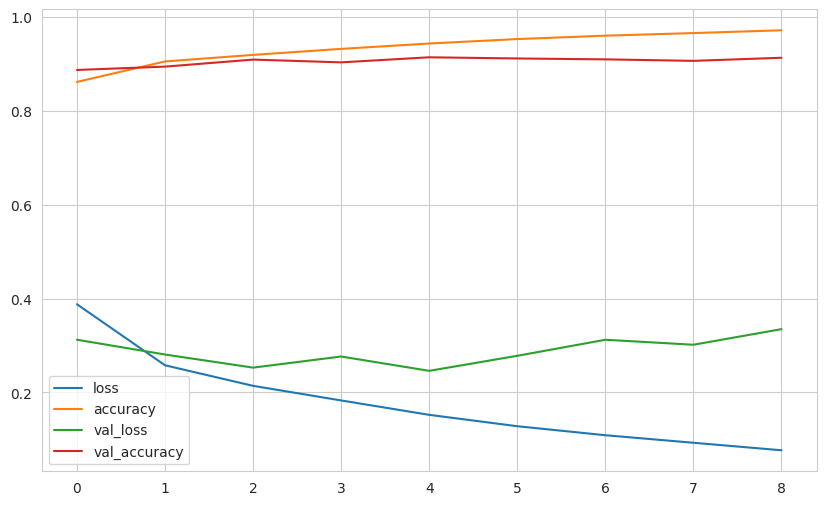

In [62]:
summary.plot();

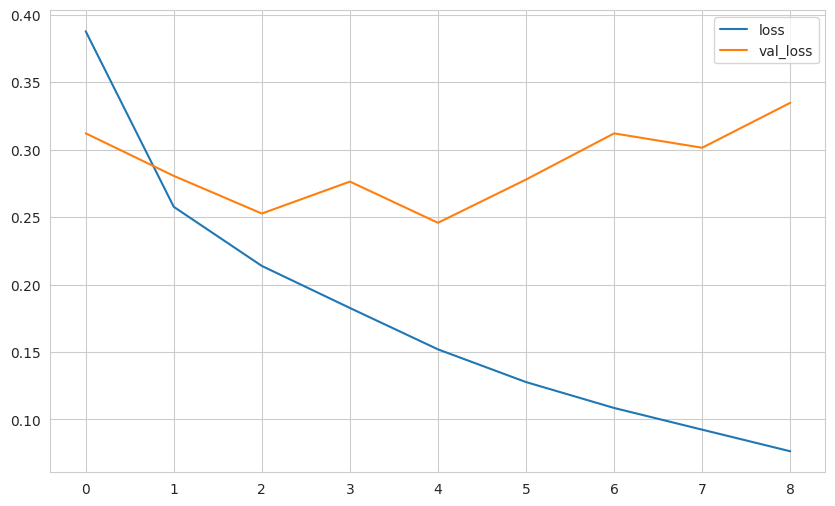

In [63]:
summary[["loss", "val_loss"]].plot();

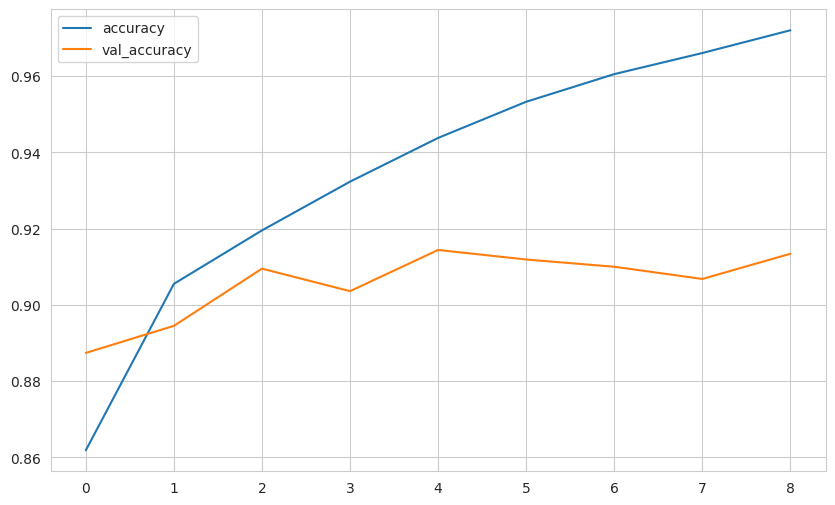

In [64]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [65]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [66]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9144


[0.2457641065120697, 0.9143999814987183]

In [67]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2457641065120697
Test accuracy: 0.9143999814987183


In [68]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[6.10863395e-08, 1.16515639e-06, 4.03320222e-09, ...,
        6.12569274e-04, 4.76943596e-09, 9.99376118e-01],
       [1.00331617e-05, 9.46796641e-10, 9.99969602e-01, ...,
        3.50243411e-11, 4.96576336e-09, 6.63183267e-13],
       [1.22357527e-10, 1.00000000e+00, 4.36733359e-13, ...,
        1.03887094e-17, 4.88017768e-16, 4.14127302e-19],
       ...,
       [7.00466440e-09, 1.28344338e-14, 2.10383863e-10, ...,
        1.84342958e-11, 1.00000000e+00, 4.52627713e-10],
       [1.45201886e-08, 9.99999881e-01, 7.62211266e-11, ...,
        1.79755299e-14, 9.83596342e-14, 1.62192918e-14],
       [1.13584116e-04, 1.59644609e-04, 2.07936610e-04, ...,
        4.24911194e-02, 5.39898232e-04, 2.88048573e-03]], dtype=float32)

In [69]:
pred_prob.shape

(10000, 10)

In [70]:
pred_prob[0]

array([6.1086340e-08, 1.1651564e-06, 4.0332022e-09, 8.0421199e-09,
       1.8346781e-10, 1.0079189e-05, 2.7501754e-08, 6.1256927e-04,
       4.7694360e-09, 9.9937612e-01], dtype=float32)

In [71]:
np.argmax(pred_prob[0])

9

In [72]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [73]:
y_pred.shape

(10000,)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.77      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [75]:
print(confusion_matrix(y_test, y_pred))

[[864   0  16  10   3   3 102   0   2   0]
 [  0 982   0  15   1   0   1   0   1   0]
 [ 17   0 865   8  51   0  57   0   2   0]
 [  8   4  10 930  22   0  21   0   5   0]
 [  0   0  62  24 836   0  77   0   1   0]
 [  0   0   0   0   0 984   0  12   0   4]
 [ 94   1  57  28  39   0 773   0   8   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  5   1   1   2   1   3   5   2 979   1]
 [  0   0   0   0   0   5   1  35   0 959]]


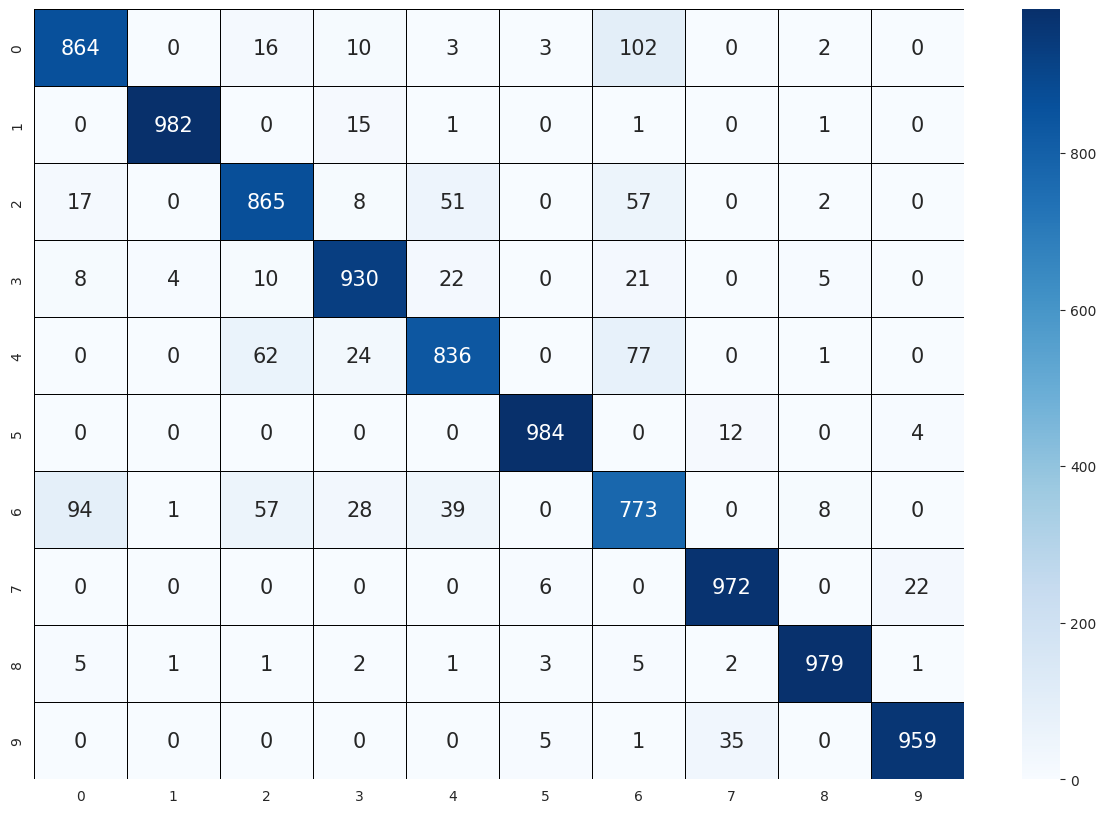

In [76]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [77]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [78]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

856

In [79]:
np.equal(y_test, y_pred).sum()

9144

## Prediction

In [101]:
my_fashion = X_test[1]

In [102]:
my_fashion.shape

(28, 28, 1)

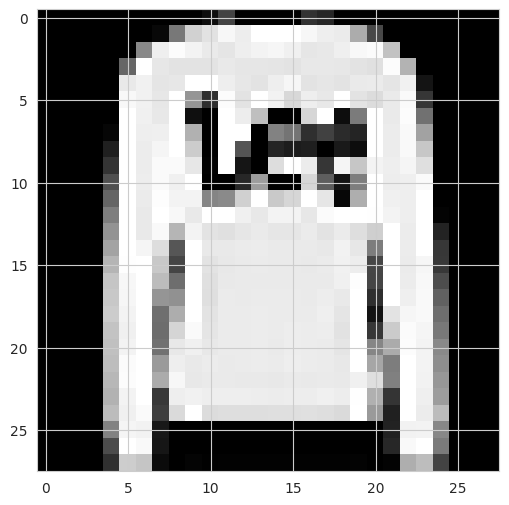

In [103]:
plt.imshow(my_fashion, cmap="gray")
plt.show()

In [92]:
np.expand_dims(my_fashion, 0).shape

(1, 28, 28, 1)

In [93]:
pred_prob = model.predict(np.expand_dims(my_fashion, 0))
pred_prob

1/1 [==============================] - 0s 60ms/step


array([[2.2632948e-08, 9.9999988e-01, 6.8762696e-10, 9.2545420e-08,
        9.1440450e-10, 3.9109988e-14, 1.6316351e-10, 1.2320180e-13,
        9.9448973e-12, 2.6390004e-14]], dtype=float32)

In [94]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [95]:
model.save("cnn-1.h5")

# Using the saved model

In [109]:
model = tf.keras.models.load_model("cnn-1.h5")

In [110]:
X_test[15].shape

(28, 28, 1)

In [111]:
pred = model.predict(np.expand_dims(X_test[15], 0))

1/1 [==============================] - 0s 60ms/step


In [112]:
np.argmax(pred)

1

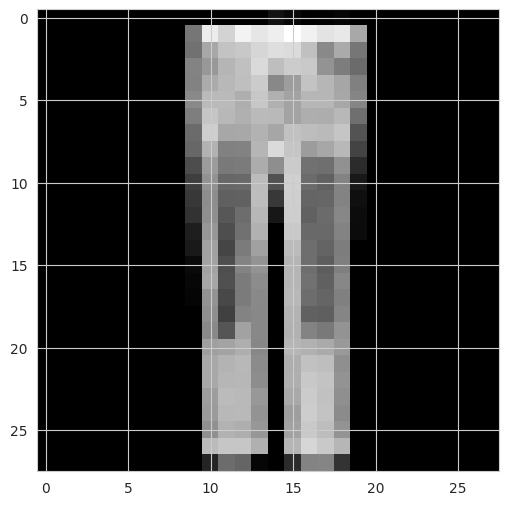

In [113]:
plt.imshow(X_test[15], cmap="gray")
plt.show()

In [114]:
classes[1]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___